<a href="https://colab.research.google.com/github/Aashi-sharma/Stock-Price-Prediction/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler

In [2]:
file_input=input("Enter csv file..")
df=pd.read_csv(file_input)

Enter csv file..NFLX.csv


MA

In [3]:
def moving_average():
  sm_average_close=[]
  sm_average_open=[]
  for i in range(0,15):
    sm_average_close.append(0)
    sm_average_open.append(0)
  i=0
  while i<(df.index[-1]-14):
   j=i
   sum_close=0
   sum_open=0

   while j<15+i:
    sum_close=sum_close+df['Close'][j]
    sum_open=sum_open+df['Open'][j]
    j=j+1
   
   sm_average_close.append(sum_close/14)
   sm_average_open.append(sum_open/14)
   
   i=i+1
  return sm_average_close,sm_average_open




EMA

In [4]:
def exponential_average():
  multiplier=2/(15+1)                                     #[2/(number of ovservation+1)]
  ex_average_close=[]
  ex_average_open=[]

  for i in range(0,15):
    ex_average_close.append(0)
    ex_average_open.append(0)
  i=0
  while i<(df.index[-1]-14):
   j=i
   while j<15+i:
    EMA_close=df['Close'][j]*multiplier+ex_average_close[j-1]*(1-multiplier)
    EMA_open=df['Open'][j]*multiplier+ex_average_open[j-1]*(1-multiplier)
    j=j+1
   ex_average_close.append(EMA_close)
   ex_average_open.append(EMA_open)
   
   i=i+1
  return ex_average_close,ex_average_open

KFold

In [5]:
 def kfold(X,Y,s,model):
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)

  acc_score=[]
  error_rmse=[]
  kf=KFold(n_splits=s)
  for train_index, test_index in kf.split(X):
    X_train,X_test=X.loc[train_index],X.loc[test_index]
    Y_train,Y_test=Y[train_index],Y[test_index]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    acc=(r2_score(Y_test,y_pred))*100
    acc_score.append(acc)
  avg_acc_score=sum(acc_score)/s
  error=np.sqrt(metrics.mean_squared_error(Y_test,y_pred))
  error_rmse.append(error)

  avg_rmse=sum(error_rmse)/s

  print('Average RMSE using KFold :{}'.format(avg_rmse))
  print('Average accuracy using KFold :{}'.format(avg_acc_score))
  return avg_rmse,avg_acc_score


def kfold_(X,Y,s,model):
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)

  acc_score=[]
  error_rmse=[]
  kf=KFold(n_splits=s)
  for train_index, test_index in kf.split(X):
    X_train,X_test=X[train_index],X[test_index]
    Y_train,Y_test=Y[train_index],Y[test_index]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_train)
    acc=(r2_score(Y_train,y_pred))*100
    acc_score.append(acc)
  avg_acc_score=sum(acc_score)/s
  error=np.sqrt(metrics.mean_squared_error(Y_train,y_pred))
  error_rmse.append(error)

  avg_rmse=sum(error_rmse)/s

  print('Average RMSE using KFold :{}'.format(avg_rmse))
  print('Average accuracy using KFold :{}'.format(avg_acc_score))
  return avg_rmse,avg_acc_score
  




Train Test Split

In [6]:
def train_test(X,Y,size,model):
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=size,random_state=10)
  regressor=model
  regressor.fit(X_train,Y_train)
  Y_pred_test=regressor.predict(X_test)
  Y_pred_train=regressor.predict(X_train)

  return Y_pred_test,Y_test,Y_train,Y_pred_train
  

Accuracy

In [7]:
def accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train):
  r_testing=(r2_score(Y_test,Y_pred_test))*100
  r_training=(r2_score(Y_train,Y_pred_train))*100
  print("Accuracy of training:",r_training)
  print("Accuracy of testing:",r_testing)
  return r_training,r_testing

Error

In [8]:
 def error_function(Y_test,Y_pred_test,Y_train,Y_pred_train):
  rmse_training=np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train))
  rmse_testing=np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))
  print('Root Mean Squared Error of training:',np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))
  print('Root Mean Squared Error of testing:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))
  return rmse_training,rmse_testing



In [9]:
df['Moving Average Close'],df['Moving Average Open']=moving_average()
df['EMA Close'],df['EMA Open']=exponential_average()

Fetch fixed interval data from dataset

In [10]:
def interval_selection(interval,df):
 row_list=[]
 index=[]
 i=0
 while i <(df.index[-1]):
   row_list.append(i)

   i=i+interval
#print(row_list)
#print(index)
 df_new=df.iloc[row_list]
 index=np.arange(len(row_list))
 df_new=df_new.set_index(index)
 return df_new



In [11]:
def predict_choose(df):
 if 'Date' in df.columns:
   df=df.drop('Date',axis=1)
 print("what you want to predict"+str(list(df)))
 choice=str(input('Enter your choice:'))
 Y=df.loc[:,choice]
 df_X=df.drop(choice,axis=1)
 X=df_X[list(df_X)]
 return X,Y
 


In [12]:
interval_wise=int(input("Do you want to predict data interval wise.\n 1.Yes\n 2.No\n  "))
if interval_wise==1:
  interval=int(input("Enter interval: "))
  df_interval=interval_selection(interval,df)
  X,Y=predict_choose(df_interval)
else:
  X,Y=predict_choose(df)



Do you want to predict data interval wise.
 1.Yes
 2.No
  1
Enter interval: 3
what you want to predict['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Moving Average Close', 'Moving Average Open', 'EMA Close', 'EMA Open']
Enter your choice:Open


In [13]:
Algorithm=['SVR','Random Forest','Multiple Regression','KNN','LogisticRegression']
Kfold_accuracy=[]
Kfold_error=[]
testing_accuracy=[]
testing_error=[]
training_accuracy=[]
training_error=[]

scaling

In [14]:
Y_r=np.array(Y).reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler().fit_transform(X)
sc_Y=StandardScaler().fit_transform(Y_r)

SVR

In [15]:
model=SVR(kernel='rbf')
rmse_svr_Kfold,accuracy_svr_Kfold=kfold_(sc_X,sc_Y,10,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,0.2,model)
r_training_svr,r_testing_svr=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_svr,rmse_testing_svr=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_svr_Kfold)
Kfold_error.append(rmse_svr_Kfold)
testing_accuracy.append(r_testing_svr)
testing_error.append(rmse_testing_svr)
training_accuracy.append(r_training_svr)
training_error.append(rmse_training_svr)


Average RMSE using KFold :0.02136493553851787
Average accuracy using KFold :87.07726212696011
Accuracy of training: 86.41566537477907
Accuracy of testing: 86.11384249535544
Root Mean Squared Error of training: 0.24321090887701663
Root Mean Squared Error of testing: 0.24653999614719876


Random Forest

In [16]:
model=RandomForestRegressor(n_estimators=100,random_state=0)
rmse_random_Kfold,accuracy_random_Kfold=kfold(X,Y,10,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(X,Y,0.2,model)
r_training_random,r_testing_random=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_random,rmse_testing_random=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_random_Kfold)
Kfold_error.append(rmse_random_Kfold)
testing_accuracy.append(r_testing_random)
testing_error.append(rmse_testing_random)
training_accuracy.append(r_training_random)
training_error.append(rmse_training_random)

Average RMSE using KFold :4.709573280547666
Average accuracy using KFold :92.1040459217509
Accuracy of training: 99.94827298576897
Accuracy of testing: 99.76327073681342
Root Mean Squared Error of training: 2.4869937795864088
Root Mean Squared Error of testing: 5.264770678207897


Multiple Linear Regression

In [17]:
model=LinearRegression()
rmse_multiple_Kfold,accuracy_multiple_Kfold=kfold(X,Y,10,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(X,Y,0.2,model)
r_training_multiple,r_testing_multiple=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_multiple,rmse_testing_multiple=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_multiple_Kfold)
Kfold_error.append(rmse_multiple_Kfold)
testing_accuracy.append(r_testing_multiple)
testing_error.append(rmse_testing_multiple)
training_accuracy.append(r_training_multiple)
training_error.append(rmse_training_multiple)

Average RMSE using KFold :0.5085182282129762
Average accuracy using KFold :97.93347034247446
Accuracy of training: 99.8672653807947
Accuracy of testing: 99.9135649697758
Root Mean Squared Error of training: 3.9838969638841766
Root Mean Squared Error of testing: 3.181254250417778


KNN

In [18]:
model=KNeighborsClassifier(n_neighbors=7)
rmse_knn_Kfold,accuracy_knn_Kfold=kfold_(sc_X,sc_Y,10,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,0.2,model)
r_training_knn,r_testing_knn=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_knn,rmse_testing_knn=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_knn_Kfold)
Kfold_error.append(rmse_knn_Kfold)
testing_accuracy.append(r_testing_knn)
testing_error.append(rmse_testing_knn)
training_accuracy.append(r_training_knn)
training_error.append(rmse_training_knn)


Average RMSE using KFold :0.019053511582654864
Average accuracy using KFold :91.94267584529685
Accuracy of training: 91.43085531574741
Accuracy of testing: 86.56126482213439
Root Mean Squared Error of training: 0.19316685232156394
Root Mean Squared Error of testing: 0.24253562503633297


Logistic Regression

In [19]:
model=LogisticRegression(solver='liblinear')
rmse_logistic_Kfold,accuracy_logistic_Kfold=kfold_(sc_X,sc_Y,20,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,0.2,model)
r_training_logistic,r_testing_logistic=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_logistic,rmse_testing_logistic=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_logistic_Kfold)
Kfold_error.append(rmse_logistic_Kfold)
testing_accuracy.append(r_testing_logistic)
testing_error.append(rmse_testing_logistic)
training_accuracy.append(r_training_logistic)
training_error.append(rmse_training_logistic)

Average RMSE using KFold :0.02200852107707376
Average accuracy using KFold :53.66602677654257
Accuracy of training: 55.44044764188649
Accuracy of testing: 52.96442687747035
Root Mean Squared Error of training: 0.44048819592160315
Root Mean Squared Error of testing: 0.45374260648651504


Create Csv

In [20]:
df_table=pd.DataFrame({'Algorithm':['SVR','Random Forest','Multiple Regression','KNN','LogisticRegression'],'KFold_Accuracy':Kfold_accuracy,'KFold Error':Kfold_error,'Training_Accuracy':training_accuracy,
                        'Traning Error':training_error,'Testing_Accuracy':testing_accuracy,'Testing Error':testing_error})
print(df_table)
df_table.to_csv("Algorithm Analysis.csv")

             Algorithm  KFold_Accuracy  KFold Error  Training_Accuracy  \
0                  SVR       87.077262     0.021365          86.415665   
1        Random Forest       92.104046     4.709573          99.948273   
2  Multiple Regression       97.933470     0.508518          99.867265   
3                  KNN       91.942676     0.019054          91.430855   
4   LogisticRegression       53.666027     0.022009          55.440448   

   Traning Error  Testing_Accuracy  Testing Error  
0       0.243211         86.113842       0.246540  
1       2.486994         99.763271       5.264771  
2       3.983897         99.913565       3.181254  
3       0.193167         86.561265       0.242536  
4       0.440488         52.964427       0.453743  


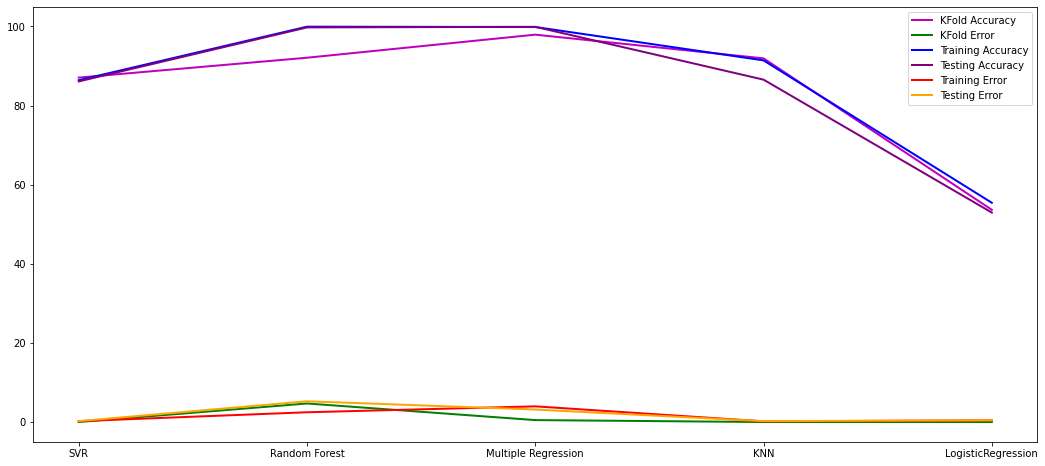

In [21]:

plt.figure(figsize=(18,8))
plt.plot(Algorithm,Kfold_accuracy,color='m',linewidth=2,label='KFold Accuracy')
plt.plot(Algorithm,Kfold_error,color='green',linewidth=2,label='KFold Error')
plt.plot(Algorithm,training_accuracy,color='blue',linewidth=2,label='Training Accuracy')
plt.plot(Algorithm,testing_accuracy,color='purple',linewidth=2,label='Testing Accuracy')
plt.plot(Algorithm,training_error,color='red',linewidth=2,label='Training Error')
plt.plot(Algorithm,testing_error,color='orange',linewidth=2,label='Testing Error')
plt.legend()


In [22]:
print("Sort your list by"+str(list(df_table)))
s=str(input('Enter your choice:'))
sorted_df=df_table.sort_values(s,ascending=False,axis=0)
print(sorted_df)


Sort your list by['Algorithm', 'KFold_Accuracy', 'KFold Error', 'Training_Accuracy', 'Traning Error', 'Testing_Accuracy', 'Testing Error']
Enter your choice:KFold_Accuracy
             Algorithm  KFold_Accuracy  KFold Error  Training_Accuracy  \
2  Multiple Regression       97.933470     0.508518          99.867265   
1        Random Forest       92.104046     4.709573          99.948273   
3                  KNN       91.942676     0.019054          91.430855   
0                  SVR       87.077262     0.021365          86.415665   
4   LogisticRegression       53.666027     0.022009          55.440448   

   Traning Error  Testing_Accuracy  Testing Error  
2       3.983897         99.913565       3.181254  
1       2.486994         99.763271       5.264771  
3       0.193167         86.561265       0.242536  
0       0.243211         86.113842       0.246540  
4       0.440488         52.964427       0.453743  


In [23]:
df_best_algo=sorted_df.iloc[0:3]
print(df_best_algo)


             Algorithm  KFold_Accuracy  KFold Error  Training_Accuracy  \
2  Multiple Regression       97.933470     0.508518          99.867265   
1        Random Forest       92.104046     4.709573          99.948273   
3                  KNN       91.942676     0.019054          91.430855   

   Traning Error  Testing_Accuracy  Testing Error  
2       3.983897         99.913565       3.181254  
1       2.486994         99.763271       5.264771  
3       0.193167         86.561265       0.242536  
